In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, or_

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
results = session.query(Measurement.tobs).\
        filter(extract('month',Measurement.date) == 6).all()

In [5]:
#  3. Convert the June temperatures to a list.
temps_june = np.ravel(results)

In [6]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
temps_june_df = pd.DataFrame(temps_june, columns=['June Temps'])
temps_june_df

,June Temps
0,78.0
1,76.0
2,78.0
3,76.0
4,77.0
...,...
1695,79.0
1696,74.0
1697,74.0
1698,76.0


In [7]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
temps_june_df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [8]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
results = session.query(Measurement.tobs).\
        filter(extract('month',Measurement.date) == 12).all()

In [9]:
# 7. Convert the December temperatures to a list.
temps_dec = np.ravel(results)

In [10]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
temps_dec_df = pd.DataFrame(temps_dec, columns=['December Temps'])
temps_dec_df

,December Temps
0,76.0
1,74.0
2,74.0
3,64.0
4,64.0
...,...
1512,71.0
1513,71.0
1514,69.0
1515,65.0


In [11]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
temps_dec_df.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


## Compare DataFrames

<AxesSubplot:ylabel='Frequency'>

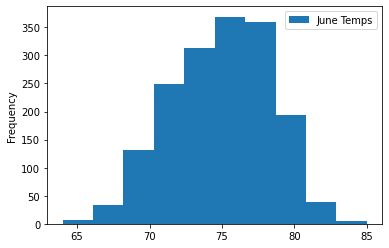

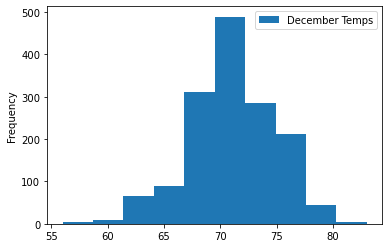

In [12]:
#  Look at basic histograms from both months
temps_june_df.plot.hist(bins=10)
temps_dec_df.plot.hist(bins=10)

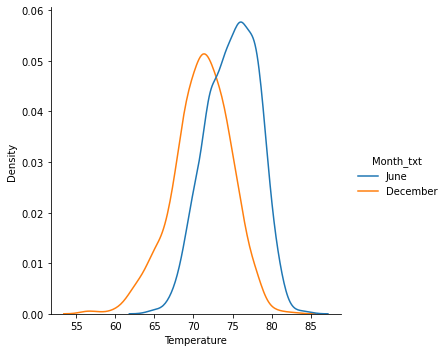

In [13]:
res = session.query(Measurement.date, Measurement.tobs, 
                    func.extract('month',Measurement.date), func.extract('year',Measurement.date)).\
                    filter(or_(extract('month',Measurement.date) == 6,extract('month',Measurement.date) == 12)).all()
res_df = pd.DataFrame(res, columns=['Date','Temperature', 'Month', 'Year'])
res_df['Month_txt'] = res_df.apply(lambda row : 'June' if row['Month'] == 6 else 'December', axis=1)
sns.displot(res_df, x="Temperature", hue='Month_txt', kind='kde')


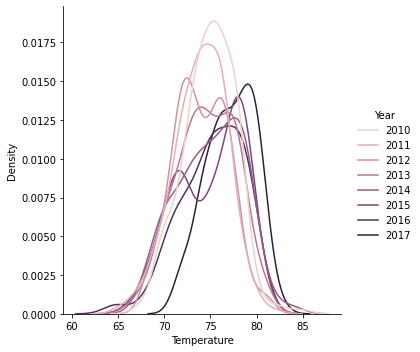

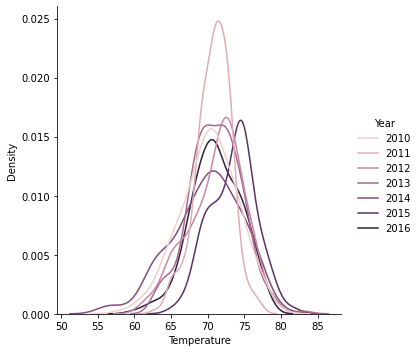

In [14]:
sns.displot(res_df.loc[res_df['Month']==6], x="Temperature", hue='Year', kind='kde')
sns.displot(res_df.loc[res_df['Month']==12], x="Temperature", hue='Year', kind='kde')